In [9]:
import os
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils import np_utils


In [10]:
#Идея обучающей выборки: Гарантировать наличие нескольких точек в небольшой окрестности произвольно взятого участка фигуры.
#Почему-то мне кажется,что это поможет.
t=0
Z=np.array([0,0])
while t < 50*np.pi :
    t+=np.pi/8                     #Воображаем себе достаточно плотную спираль и выбираем на ней точки.Я брал r=1/35pi*t
    b=np.array([1/(35*np.pi)*t,t]) #В итоге вышло 400 точек в полярных координатах
    Z=np.vstack((Z, b))
    
X=[[r*np.cos(t),r*np.sin(t)] for [r,t] in Z] #Делаем из них точки в декартовых координатах.
X=np.vstack(X)

Y = [
    1 if x ** 2 + y ** 2 <= 1 else 0
    for [x, y] in X
]

In [11]:
l0 = Input(shape=(2,))
l1 = Dense(6, activation='sigmoid', use_bias=True)(l0)
l2 = Dense(6, activation='sigmoid', use_bias=True)(l1) #Лишний слой для точности
l3 = Dense(1, activation='sigmoid', use_bias=False)(l2)

model = Model(input=l0, output=l3)

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)


In [13]:
if os.path.isfile("RedBall"):
    model.load_weights("RedBall")
else:
    model.fit(
        X, Y,
        epochs=20000,
        verbose=False
    )

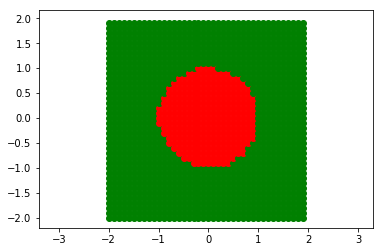

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.r_[-2:2:0.1]

XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.5 else 'green')

plt.show() #Итог:Вышел не квадрат-уже хорошо.Радует,что граница между цветами вышла уверенная.Это лучше видно на втором графике.

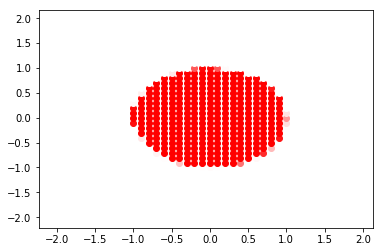

In [6]:
def saturate(v):
    return min(1, max(0, v))

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))])

plt.show()

In [8]:
 model.save("RedBall")